## test adapt

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from adapt.instance_based import KMM

np.random.seed(0)

X_source = np.random.randn(1000, 1) * 2 - 1
Y_source = (X_source[:, 0] > -1) & (X_source[:, 0] < 1)

In [13]:
X_target = np.random.randn(1000, 1) * 2 + 1
Y_target = (X_target[:, 0] > -1.) & (X_target[:, 0] < 1.)

In [14]:
src_only = LogisticRegression(penalty=None)
src_only.fit(X_source, Y_source)

src_only.score(X_target, Y_target)

0.209

In [15]:
adapt_model = KMM(
    estimator=LogisticRegression(penalty="none"), 
    Xt=X_target,
    kernel="rbf",  # Gaussian kernel
    gamma=1.,     # Bandwidth of the kernel
    verbose=0,
    random_state=0
)

In [16]:
adapt_model.fit(X_source, Y_source)
adapt_model.score(X_target, Y_target)


0.574

In [17]:
import os 

DOMAINS = ["amazon", "dslr", "webcam"]

def create_dataset_labels(base_path="datasets/office31", out_path="datasets/office31_labeled"):
    """
    source_domains: List of domain(s) used for training and evaluating
    target_domain: List of domain(s) used for testing
    base_path: Base directory of office31 dataset. The structure of this directory should be as follows: 
                {domain_name}/{class_name}/{image_name}.jpg
                e.g. amazon/bike_helmet/frame_0003.jpg
    out_path: The path to store splitted data
    """


    for domain in DOMAINS:
        os.makedirs(os.path.join(out_path, domain), exist_ok=True)  

        with open(os.path.join(out_path, domain, "labels.txt")) as f:
            for i, class_name in enumerate(os.listdir(os.path.join(base_path, domain))):
                print(i, class_name)
                for j, image in enumerate(os.listdir(os.path.join(base_path, domain, class_name))):
                    print(j, image)
                    break


create_dataset_labels()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/office31_labeled/amazon/labels.txt'

In [ ]:
import tensorflow as tf
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  "datasets/office31/amazon",
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

class_names = train_ds.class_names


Found 2817 files belonging to 31 classes.
Using 2254 files for training.
Using 563 files for validation.


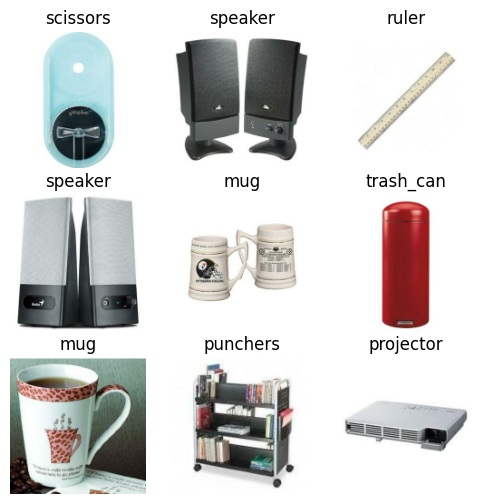

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import os 

DOMAINS = ["amazon", "dslr", "webcam"]

def split_dataset(source_domains=[], target_domains=[], base_path="datasets/office31", out_path="datasets/office31_splitted"):
    """
    source_domains: List of domain(s) used for training and evaluating
    target_domain: List of domain(s) used for testing
    base_path: Base directory of office31 dataset. The structure of this directory should be as follows: 
                {domain_name}/{class_name}/{image_name}.jpg
                e.g. amazon/bike_helmet/frame_0003.jpg
    out_path: The path to store splitted data
    """

    os.makedirs(os.path.join(out_path, "source"), exist_ok=True)
    os.makedirs(os.path.join(out_path, "target"), exist_ok=True)

    for domain in target_domains:
        for i, class_name in enumerate(os.listdir(os.path.join(base_path, domain))):
            print(i, class_name)
            for j, image in enumerate(os.listdir(os.path.join(base_path, domain, class_name))):
                print(j, image)
                break


split_dataset(["amazon"], ["webcam"])

0 mug
0 frame_0026.jpg
1 phone
0 frame_0012.jpg
2 monitor
0 frame_0026.jpg
3 mobile_phone
0 frame_0026.jpg
4 paper_notebook
0 frame_0026.jpg
5 keyboard
0 frame_0026.jpg
6 bottle
0 frame_0012.jpg
7 stapler
0 frame_0018.jpg
8 scissors
0 frame_0018.jpg
9 punchers
0 frame_0026.jpg
10 laptop_computer
0 frame_0026.jpg
11 bookcase
0 frame_0012.jpg
12 printer
0 frame_0018.jpg
13 desktop_computer
0 frame_0018.jpg
14 letter_tray
0 frame_0018.jpg
15 ring_binder
0 frame_0026.jpg
16 back_pack
0 frame_0026.jpg
17 file_cabinet
0 frame_0018.jpg
18 headphones
0 frame_0026.jpg
19 desk_chair
0 frame_0026.jpg
20 speaker
0 frame_0026.jpg
21 projector
0 frame_0026.jpg
22 pen
0 frame_0026.jpg
23 trash_can
0 frame_0018.jpg
24 bike_helmet
0 frame_0026.jpg
25 bike
0 frame_0018.jpg
26 mouse
0 frame_0026.jpg
27 calculator
0 frame_0026.jpg
28 desk_lamp
0 frame_0018.jpg
29 ruler
0 frame_0003.jpg
30 tape_dispenser
0 frame_0018.jpg


In [ ]:

for domain in ["amazon", "dslr", "webcam"]:
    os.rename("office_dataset/{}/images".format(domain), "office31/train/{}".format(domain))


In [ ]:

for domain in ["webcam", "dslr"]:
    os.makedirs("office31/val/{}".format(domain))
    os.makedirs("office31/test/{}".format(domain))

# Move a subset of the images to the validation and test sets
for domain in ["webcam", "dslr"]:
    for i, file in enumerate(os.listdir("office31/train/{}".format(domain))):
        if i % 10 == 0:
            os.rename("office31/train/{}/{}".format(domain, file), "office31/val/{}/{}".format(domain, file))
        elif i % 10 == 1:
            os.rename("office31/train/{}/{}".format(domain, file), "office31/test/{}/{}".format(domain, file))

----

## Test adapt on office

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

2021-05-14 11:01:16.482176: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


### Load Data

#### Load data Saba's way

In [2]:
from data_loader import load_data, get_input_and_labels_from_batch_ds

train_ds, val_ds, target_ds = load_data("amazon", "webcam", image_size=(224,224))
Xs, ys = get_input_and_labels_from_batch_ds(train_ds)
Xv, yv = get_input_and_labels_from_batch_ds(val_ds)
Xt, yt = get_input_and_labels_from_batch_ds(target_ds)

Found 2817 files belonging to 31 classes.
Using 2254 files for training.


2021-05-14 11:01:22.530751: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-14 11:01:22.537354: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.92GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-14 11:01:22.538192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.93GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-14 11:01:22.538216: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-14 11:01:22.539810: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.

Found 2817 files belonging to 31 classes.
Using 563 files for validation.
Found 795 files belonging to 31 classes.


In [ ]:
print("train:", Xs.shape, ys.shape)
print("val:", Xv.shape, yv.shape)
print("target:", Xt.shape, yt.shape)

train: (2254, 224, 224, 3) (2254,)
val: (563, 224, 224, 3) (563,)
target: (795, 224, 224, 3) (795,)


#### Load data (official doc)

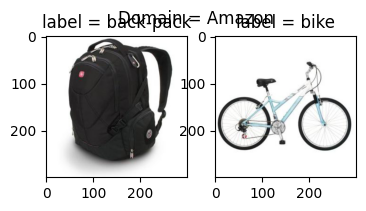

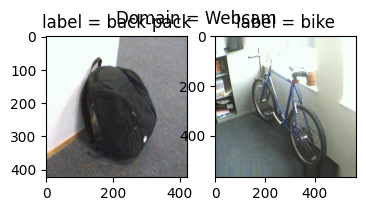

In [ ]:
path = "datasets/office31/" # path to downloaded Office dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.imshow(plt.imread(path+"amazon/back_pack/frame_0001.jpg"))
ax2.imshow(plt.imread(path+"amazon/bike/frame_0001.jpg"))
ax1.set_title("label = back-pack"); ax2.set_title("label = bike");
plt.suptitle("Domain = Amazon"); plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.imshow(plt.imread(path+"webcam/back_pack/frame_0001.jpg"))
ax2.imshow(plt.imread(path+"webcam/bike/frame_0001.jpg"))
ax1.set_title("label = back-pack"); ax2.set_title("label = bike");
plt.suptitle("Domain = Webcam"); plt.show()

In [ ]:
def get_Xy(domain, path_to_folder=path):

    path = path_to_folder + domain 
    X = []
    y = []

    for r, d, f in os.walk(path):
        for direct in d:
            if not ".ipynb_checkpoints" in direct:
                for r, d, f in os.walk(os.path.join(path , direct)):
                    for file in f:
                        path_to_image = os.path.join(r, file)
                        if not ".ipynb_checkpoints" in path_to_image:
                            image = Image.open(path_to_image)
                            image = image.resize((224, 224), Image.ANTIALIAS)
                            image = np.array(image, dtype=int)
                            X.append(image)
                            y.append(direct)
    return X, y

Xs, ys = get_Xy("amazon")
Xt, yt = get_Xy("webcam")

/tmp/ipykernel_12245/3952787103.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


In [ ]:
print(len(Xs), len(ys))
print(Xs[0].shape)
print(ys[0])

2817 2817
(224, 224, 3)
mug


In [ ]:
print(Xs[0], ys[0])


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]] mug


In [ ]:
print(Xs_[0], Ys_[0])

[[[131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  ...
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]]

 [[131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  ...
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]]

 [[131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  ...
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]]

 ...

 [[131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  ...
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]]

 [[131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  [131.32    138.22101 151.061  ]
  ...
  [131.32    138.22101 151.061  ]
  [1

### Model

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input

# if you want to download weights, remove weights param in ResNet40 and remove this line
WEIGHTS_PATH = 'model-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

resnet50 = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling="avg", weights=WEIGHTS_PATH, classes=31)

first_layer = resnet50.get_layer('conv5_block2_out')
inputs = Input(first_layer.output_shape[1:])

for layer in resnet50.layers[resnet50.layers.index(first_layer)+1:]:
    if layer.name == "conv5_block3_1_conv":
        x = layer(inputs)
    elif layer.name == "conv5_block3_add":
        x = layer([inputs, x])
    else:
        x = layer(x)

first_blocks = Model(resnet50.input, first_layer.output)
last_block = Model(inputs, x)


In [4]:
def load_resnet50(path="resnet50_last_block.hdf5"):
    model = load_model(path)
    for i in range(len(model.layers)):
        if model.layers[i].__class__.__name__ == "BatchNormalization":
            model.layers[i].trainable = False
    return model

last_block.summary()
last_block.save("resnet50_last_block.hdf5")


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 7, 7, 2048)] 0                                            
__________________________________________________________________________________________________
conv5_block3_1_conv (Conv2D)    (None, 7, 7, 512)    1049088     input_2[0][0]                    
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_1_conv[1][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 7, 7, 512)    0           conv5_block3_1_bn[1][0]          
_______________________________________________________________________________________

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm

def get_task(dropout=0.5, max_norm=0.5):
    model = Sequential()
    model.add(Dense(1024, activation="relu",
                   kernel_constraint=MaxNorm(max_norm),
                   bias_constraint=MaxNorm(max_norm)))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation="relu",
                   kernel_constraint=MaxNorm(max_norm),
                   bias_constraint=MaxNorm(max_norm)))
    model.add(Dropout(dropout))
    model.add(Dense(31, activation="softmax",
                   kernel_constraint=MaxNorm(max_norm),
                   bias_constraint=MaxNorm(max_norm)))
    return model

In [6]:
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.optimizers import SGD

class MyDecay(LearningRateSchedule):

    def __init__(self, max_steps=1000, mu_0=0.01, alpha=10, beta=0.75):
        self.mu_0 = mu_0
        self.alpha = alpha
        self.beta = beta
        self.max_steps = float(max_steps)

    def __call__(self, step):
        p = step / self.max_steps
        return self.mu_0 / (1+self.alpha * p)**self.beta

In [8]:
lr = 0.04
momentum = 0.9
alpha = 0.0002

optimizer_task = SGD(learning_rate=MyDecay(mu_0=lr, alpha=alpha),
                     momentum=momentum, nesterov=True)
optimizer_enc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha),
                    momentum=momentum, nesterov=True)

### Normal Training

In [9]:
from adapt.parameter_based import FineTuning

finetunig = FineTuning(encoder=load_resnet50(),
                         task=get_task(),
                         optimizer=optimizer_task,
                         optimizer_enc=optimizer_enc,
                         loss="categorical_crossentropy",
                         metrics=["acc"],
                         copy=False,
                         pretrain=True,
                         pretrain__epochs=5)

In [10]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf 

gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

X_source = first_blocks.predict(preprocess_input(Xs))
X_target = first_blocks.predict(preprocess_input(Xt))

one = OneHotEncoder(sparse=False)
one.fit(np.array(ys).reshape(-1, 1))

y_source = one.transform(np.array(ys).reshape(-1, 1))
y_target = one.transform(np.array(yt).reshape(-1, 1))

print("X source shape: %s"%str(X_source.shape))
print("X target shape: %s"%str(X_target.shape))

2021-05-14 11:01:58.742681: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.92GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-14 11:01:58.743821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.93GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-14 11:01:58.743876: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-14 11:01:58.743924: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-14 11:01:58.743957: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.s

X source shape: (2254, 7, 7, 2048)
X target shape: (795, 7, 7, 2048)


/home/shashemi/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


: 

In [ ]:
finetunig.fit(X_source, y_source, epochs=50, batch_size=32, validation_data=(X_target, y_target))

/home/shashemi/miniconda3/envs/tf/lib/python3.8/site-packages/adapt/base.py:1108: UserWarning: The model has already been compiled. To perform pretraining, the model will be compiled again. Please make sure to pass the compile parameters in __init__ to avoid errors.
  warnings.warn("The model has already been compiled. "


Epoch 1/5
71/71 [==============================] - 2s 31ms/step - loss: 1.8341 - acc: 0.4855 - val_loss: 2.0844 - val_acc: 0.4415
Epoch 2/5
71/71 [==============================] - 2s 25ms/step - loss: 1.6973 - acc: 0.5189 - val_loss: 2.1329 - val_acc: 0.4591
Epoch 3/5
71/71 [==============================] - 2s 23ms/step - loss: 1.6789 - acc: 0.5396 - val_loss: 2.0786 - val_acc: 0.3962
Epoch 4/5
71/71 [==============================] - 2s 25ms/step - loss: 1.6784 - acc: 0.5326 - val_loss: 2.1376 - val_acc: 0.4453
Epoch 5/5
71/71 [==============================] - 2s 25ms/step - loss: 1.7345 - acc: 0.5132 - val_loss: 2.0120 - val_acc: 0.4667
Epoch 1/50
71/71 [==============================] - 3s 38ms/step - loss: 1.5667 - acc: 0.5704 - val_loss: 2.1505 - val_acc: 0.4893
Epoch 2/50
71/71 [==============================] - 2s 33ms/step - loss: 1.2383 - acc: 0.6730 - val_loss: 1.8533 - val_acc: 0.5371
Epoch 3/50
71/71 [==============================] - 2s 32ms/step - loss: 0.9763 - acc: 0

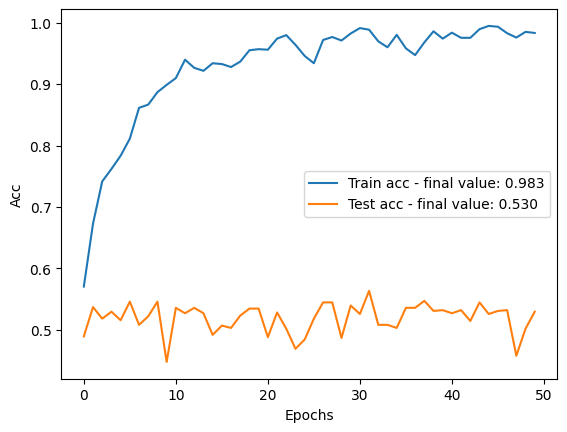

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

acc = finetunig.history.history["acc"]
val_acc = finetunig.history.history["val_acc"]

plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Acc"); plt.show()

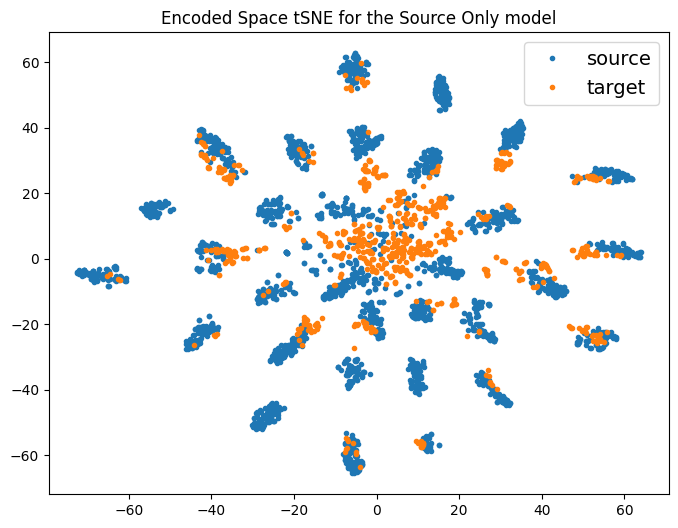

In [ ]:
from sklearn.manifold import TSNE

Xs_enc = finetunig.transform(X_source)
Xt_enc = finetunig.transform(X_target)

np.random.seed(0)
X_ = np.concatenate((Xs_enc, Xt_enc))
X_tsne = TSNE(2).fit_transform(X_)
plt.figure(figsize=(8, 6))
plt.plot(X_tsne[:len(X_source), 0], X_tsne[:len(X_source), 1], '.', label="source")
plt.plot(X_tsne[len(X_source):, 0], X_tsne[len(X_source):, 1], '.', label="target")
plt.legend(fontsize=14)
plt.title("Encoded Space tSNE for the Source Only model")
plt.show()

### Adapt

In [ ]:
# We shuffle the data, it may not be needed but we want to avoid classes being not represented
# in some batch due to the fact that the datasets are sorted by classes.
# np.random.seed(0)
# shuffle_src = np.random.choice(len(Xs), len(Xs), replace=False)
# shuffle_tgt = np.random.choice(len(Xt), len(Xt), replace=False)

# Xs = Xs[shuffle_src]
# ys_lab = ys_lab[shuffle_src]
# Xt = Xt[shuffle_tgt]
# yt_lab = yt_lab[shuffle_tgt]

In [ ]:
from adapt.feature_based import MDD
from adapt.utils import UpdateLambda
import tensorflow as tf 

np.random.seed(123)
tf.random.set_seed(123)

lr = 0.04
momentum = 0.9
alpha = 0.0002

encoder = load_resnet50()
task = get_task()

optimizer_task = SGD(learning_rate=MyDecay(mu_0=lr, alpha=alpha),
                     momentum=momentum, nesterov=True)
optimizer_enc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha),
                    momentum=momentum, nesterov=True)
optimizer_disc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha))


mdd = MDD(encoder, task,
            loss="categorical_crossentropy",
            metrics=["acc"],
            copy=False,
            lambda_=tf.Variable(0.),
            gamma=2.,
            optimizer=optimizer_task,
            optimizer_enc=optimizer_enc,
            optimizer_disc=optimizer_disc,
            callbacks=[UpdateLambda(lambda_max=0.1)])

In [ ]:
mdd.fit(X=X_source[:-1], y=y_source[:-1], Xt=X_target, epochs=50, batch_size=32, validation_data=(X_target, y_target))



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/50
71/71 [==============================] - 4s 54ms/step - loss: 2.8755 - acc: 0.2108 - disc_loss: 6.8939 - val_loss: 2.3044 - val_acc: 0.3686
Epoch 2/50
71/71 [==============================] - 4s 61ms/step - loss: 1.6812 - acc: 0.5260 - disc_loss: 6.6367 - val_loss: 1.8391 - val_acc: 0.5208
Epoch 3/50
71/71 [==============================] - 4s 58ms/step - loss: 1.2456 - acc: 0.6567 - disc_loss: 6.2507 - val_loss: 2.0318 - val_acc: 0.5208
Epoch 4/50
71/71 [==============================] - 4s 

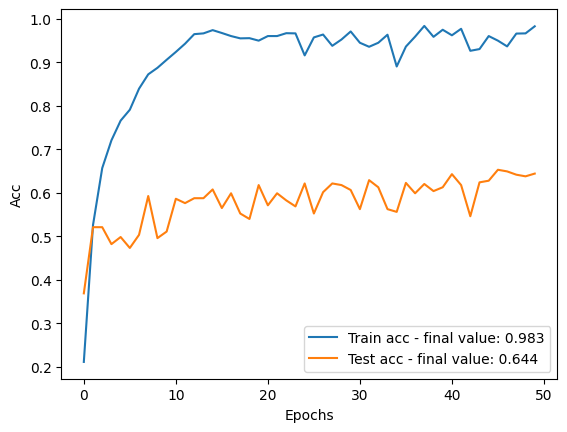

In [ ]:
acc = mdd.history.history["acc"]
val_acc = mdd.history.history["val_acc"]
plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Acc"); plt.show()

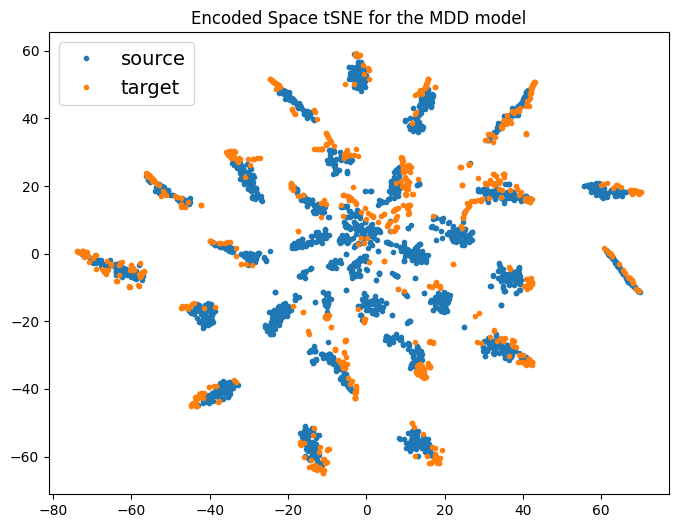

In [ ]:
from sklearn.manifold import TSNE

Xs_enc = mdd.transform(X_source)
Xt_enc = mdd.transform(X_target)

np.random.seed(0)
X_ = np.concatenate((Xs_enc, Xt_enc))
X_tsne = TSNE(2).fit_transform(X_)
plt.figure(figsize=(8, 6))
plt.plot(X_tsne[:len(X_source), 0], X_tsne[:len(X_source), 1], '.', label="source")
plt.plot(X_tsne[len(X_source):, 0], X_tsne[len(X_source):, 1], '.', label="target")
plt.legend(fontsize=14)
plt.title("Encoded Space tSNE for the MDD model")
plt.show()

------

# CherkNevis

In [ ]:
def load_dt_from_tensorflow(path):
    validation_dataset =tf.keras.preprocessing.image_dataset_from_directory(path,
                                              shuffle=True,
                                              batch_size=32,
                                              image_size=(224,224))
    return validation_dataset

def load_image_from_tensorflow(path):
    validation_dataset =tf.keras.preprocessing.image_dataset_from_directory(path,
                                              shuffle=False,
                                              batch_size=32,
                                              image_size=(224,224))
    for image, _ in validation_dataset.take(1):
        img = image
    return img

def load_image_from_pil(path):
    img = Image.open(path)
    img = img.resize((224, 224),Image.BILINEAR)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:


import datetime
print(d)

s = datetime.datetime.now()
for i in range(10):
    d = load_dt_from_tensorflow('datasets/temp')
    xy = [(x, y) for x, y in d]
    xx = np.concatenate([x for x, y in xy], axis=0)
    yy = np.concatenate([y for x, y in xy], axis=0)

    print(xx[0][0][0], xx[1][0][0])
    print(yy)

e = datetime.datetime.now()
print(e-s)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 146.79688]
[1 0]
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 146.79688]
[1 0]
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 146.79688]
[1 0]
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 146.79688]
[1 0]
Found 2 files belonging to 2 classes.
[168.79688 158.79688 146.79688] [255. 255. 255.]
[0 1]
Found 2 files belonging to 2 classes.
[168.79688 158.79688 146.79688] [255. 255. 255.]
[0 1]
Found 2 files belonging to 2 classes.
[168.79688 158.79688 146.79688] [255. 255. 255.]
[0 1]
Found 2 files belonging to 2 classes.
[168.79688 158.79688 146.79688] [255. 255. 255.]
[0 1]
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 146.79688]
[1 0]
Found 2 files belonging to 2 classes.
[255. 255. 255.] [168.79688 158.79688 14

In [ ]:
s = datetime.datetime.now()
dd = d.unbatch()
xy = dd.map(lambda x, y: (x,y))
xx = list(xy.map(lambda x, y: x))
yy = list(xy.map(lambda x, y: y))
print(xx[0][0][0], xx[1][0][0])
print(yy)
e = datetime.datetime.now()
print(e-s)

tf.Tensor([168.79688 158.79688 146.79688], shape=(3,), dtype=float32) tf.Tensor([255. 255. 255.], shape=(3,), dtype=float32)
[<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=0>]
0:00:00.197981


In [ ]:
i1 = load_image_from_tensorflow('datasets/temp')
i2 = load_image_from_pil('datasets/temp/saba/frame_0001.jpg')

Found 1 files belonging to 1 classes.


/tmp/ipykernel_12245/1478134846.py:12: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((224, 224),Image.BILINEAR)


In [ ]:
idx = 150
print(i1[0][idx][idx])
print(i2[0][idx][idx])

tf.Tensor([36.0625 37.0625 32.0625], shape=(3,), dtype=float32)
[36 36 34]


In [ ]:
p1 = first_blocks.predict(preprocess_input(i1.astype(np.int32)))
p2 = first_blocks.predict(preprocess_input(i2))


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'astype'

In [ ]:
p1.shape

(1, 7, 7, 2048)

In [ ]:
idx, idx2 = 1, 1045
print(p1[0][idx][idx][0:10])
print(p2[0][idx][idx][0:10])

[0.         0.01094218 0.         0.         0.         0.
 0.         0.08283848 0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.10250913 0.         0.        ]


In [ ]:
from adapt.utils import make_classification_da
from adapt.feature_based import MDD
Xs, ys, Xt, yt = make_classification_da()
model = MDD(lambda_=0.1, gamma=4., Xt=Xt, metrics=["acc"], random_state=0)
model.fit(Xs, ys, epochs=100, verbose=0)
model.score(Xt, yt)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



2021-05-13 09:48:13.580128: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - 0s 1ms/step - loss: 0.1545 - acc: 0.9100


0.15446723997592926

In [ ]:
from sklearn.linear_model import RidgeClassifier
from adapt.feature_based import CORAL

model = CORAL(RidgeClassifier(), Xt=Xt, random_state=0)
model.fit(Xs, ys)
model.score(Xt, yt)

Fit transform...
Previous covariance difference: 0.013181
New covariance difference: 0.000004
Fit Estimator...


0.86

In [ ]:
from adapt.feature_based import CORAL
from adapt.utils import UpdateLambda
import tensorflow as tf 

np.random.seed(123)
tf.random.set_seed(123)

lr = 0.04
momentum = 0.9
alpha = 0.0002

encoder = load_resnet50()
task = get_task()

optimizer_task = SGD(learning_rate=MyDecay(mu_0=lr, alpha=alpha),
                     momentum=momentum, nesterov=True)
optimizer_enc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha),
                    momentum=momentum, nesterov=True)
optimizer_disc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha))


mdd = CORAL(encoder, task,
            loss="categorical_crossentropy",
            metrics=["acc"],
            copy=False,
            lambda_=tf.Variable(0.),
            optimizer=optimizer_task,
            callbacks=[UpdateLambda(lambda_max=0.1)])

model.fit(X_source, y_source)
model.score(X_target, y_target)

NameError: name 'X_source' is not defined

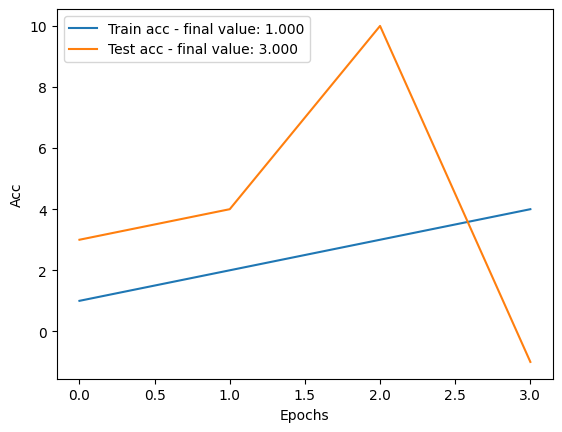

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4], label="Train acc - final value: %.3f"%1)
plt.plot([3,4,10, -1], label="Test acc - final value: %.3f"%3)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.savefig('image.png') 

-----

# Check Models

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import OneHotEncoder


def get_resnet():
    # if you want to download weights, remove weights param in ResNet40 and remove this line
    WEIGHTS_PATH = 'model-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

    resnet50 = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling="avg", weights=WEIGHTS_PATH, classes=31)

    first_layer = resnet50.get_layer('conv5_block2_out')
    inputs = Input(first_layer.output_shape[1:])

    for layer in resnet50.layers[resnet50.layers.index(first_layer)+1:]:
        if layer.name == "conv5_block3_1_conv":
            x = layer(inputs)
        elif layer.name == "conv5_block3_add":
            x = layer([inputs, x])
        else:
            x = layer(x)

    first_blocks = Model(resnet50.input, first_layer.output)
    last_block = Model(inputs, x)


    def load_resnet50(path="model-weights/resnet50_last_block.hdf5"):
        model = load_model(path)
        for i in range(len(model.layers)):
            if model.layers[i].__class__.__name__ == "BatchNormalization":
                model.layers[i].trainable = False
        return model

    # last_block.summary()
    last_block.save("model-weights/resnet50_last_block.hdf5")

    return first_blocks, last_block, load_resnet50


def get_task(dropout=0.5, max_norm=0.5):
    model = Sequential()
    model.add(Dense(1024, activation="relu",
                kernel_constraint=MaxNorm(max_norm),
                bias_constraint=MaxNorm(max_norm)))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation="relu",
                kernel_constraint=MaxNorm(max_norm),
                bias_constraint=MaxNorm(max_norm)))
    model.add(Dropout(dropout))
    model.add(Dense(31, activation="softmax",
                kernel_constraint=MaxNorm(max_norm),
                bias_constraint=MaxNorm(max_norm)))
    return model


class MyDecay(LearningRateSchedule):
    def __init__(self, max_steps=1000, mu_0=0.01, alpha=10, beta=0.75):
        self.mu_0 = mu_0
        self.alpha = alpha
        self.beta = beta
        self.max_steps = float(max_steps)

    def __call__(self, step):
        p = step / self.max_steps
        return self.mu_0 / (1+self.alpha * p)**self.beta


def get_input_and_target_for_head(first_blocks, Xs, ys, Xv, yv, Xt, yt):
    X_source = first_blocks.predict(preprocess_input(Xs))
    X_val = first_blocks.predict(preprocess_input(Xv))
    X_target = first_blocks.predict(preprocess_input(Xt))

    one = OneHotEncoder(sparse=False)
    one.fit(np.array(ys).reshape(-1, 1))

    y_source = one.transform(np.array(ys).reshape(-1, 1))
    y_val = one.transform(np.array(yv).reshape(-1, 1))
    y_target = one.transform(np.array(yt).reshape(-1, 1))

    print("X source shape: %s"%str(X_source.shape))
    print("X target shape: %s"%str(X_target.shape))

    return X_source, y_source, X_val, y_val, X_target, y_target


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np
from adapt.feature_based import MDD
from adapt.utils import UpdateLambda
from data_loader import load_data, get_input_and_labels_from_batch_ds

epochs=2
batch_size=32

train_ds, val_ds, target_ds = load_data("amazon", "webcam", image_size=(224,224))
Xs, ys = get_input_and_labels_from_batch_ds(train_ds)
Xv, yv = get_input_and_labels_from_batch_ds(val_ds)
Xt, yt = get_input_and_labels_from_batch_ds(target_ds)

Found 2817 files belonging to 31 classes.
Using 2254 files for training.


2021-05-13 12:58:05.917553: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-13 12:58:05.925685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.92GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-13 12:58:05.926565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:0a:00.0 name: GeForce GTX TITAN X computeCapability: 5.2
coreClock: 1.076GHz coreCount: 24 deviceMemorySize: 11.93GiB deviceMemoryBandwidth: 313.37GiB/s
2021-05-13 12:58:05.926598: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-13 12:58:05.959468: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.

Found 2817 files belonging to 31 classes.
Using 563 files for validation.
Found 795 files belonging to 31 classes.


In [38]:
from adapt.feature_based import DeepCORAL,MCD,MDD, WDGRL ,CDAN ,CCSA ,DANN,ADDA
from adapt.parameter_based import RegularTransferNN, FineTuning

first_blocks, _, load_resnet50 = get_resnet()
X_source, y_source, X_val, y_val, X_target, y_target = get_input_and_target_for_head(first_blocks, Xs, ys, Xv, yv, Xt, yt)
model_name ="FineTuning"

lr = 0.04
momentum = 0.9
alpha = 0.0002

encoder = load_resnet50()
task = get_task()

optimizer_task = SGD(learning_rate=MyDecay(mu_0=lr, alpha=alpha),
                    momentum=momentum, nesterov=True)
optimizer_enc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha),
                    momentum=momentum, nesterov=True)
optimizer_disc = SGD(learning_rate=MyDecay(mu_0=lr/10., alpha=alpha))

if model_name == "MDD":
    model = MDD(encoder, task,
            loss="categorical_crossentropy",
            metrics=["acc"],
            copy=False,
            gamma=2.,
            lambda_=tf.Variable(0.),
            optimizer=optimizer_task,
            optimizer_enc=optimizer_enc,
            optimizer_disc=optimizer_disc,
            callbacks=[UpdateLambda(lambda_max=0.1)])
elif model_name =="DeepCORAL":
    model = DeepCORAL(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                lambda_=tf.Variable(0.),
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                callbacks=[UpdateLambda(lambda_max=0.1)])
elif model_name =="MCD": 
    model = MCD(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc)
elif model_name == "WDGRL":
    model = WDGRL(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                )
elif model_name == "CDAN":
    model = CDAN(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                )
elif model_name == "CCSA":
    model = CCSA(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                )
elif model_name == "DANN":
    model = DANN(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                )
elif model_name == "ADDA":
    model = ADDA(encoder, task,
                loss="categorical_crossentropy",
                metrics=["acc"],
                copy=False,
                optimizer=optimizer_task,
                optimizer_enc=optimizer_enc,
                optimizer_disc=optimizer_disc,
                )

print("MODEL_NAME:", model.name)
model.fit(X=X_source[:-1], y=y_source[:-1], Xt=X_target, yt=y_target, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

acc = model.history.history.get("acc", None) or model.history.history.get("disc_acc", None)
val_acc = model.history.history["val_acc"]
print(model.score(X_source, y_source))
print(model.score(X_val, y_val))
print(model.score(X_target, y_target))

plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Acc")


X source shape: (2254, 7, 7, 2048)
X target shape: (795, 7, 7, 2048)


/home/shashemi/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MODEL_NAME: fine_tuning


TypeError: fit() got multiple values for argument 'X'

In [37]:
model.history.history.keys()

[0.5, 0.5]